# Respostas dos desafios da aula 3

## Obtenção dos dados

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [35]:
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [36]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [37]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Desafios

## Desafio 1 do Thiago Gonçalves

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

In [38]:
dtf_des1 = imdb_usa[["imdb_score", "color"]].dropna()

dtf_des1.groupby(by="color")["imdb_score"].count()

color
 Black and White     148
Color               3611
Name: imdb_score, dtype: int64

In [39]:
dtf_des1["color"].value_counts(normalize=True)

Color               0.960628
 Black and White    0.039372
Name: color, dtype: float64

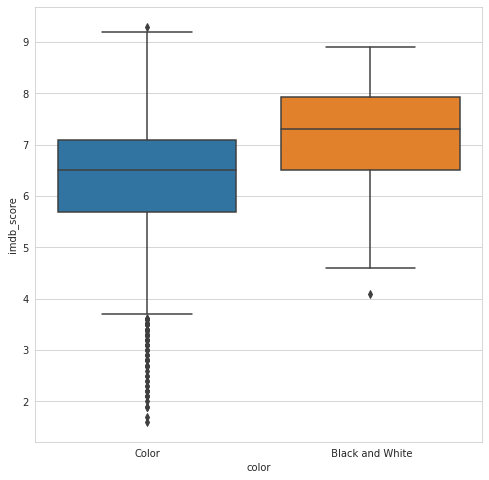

In [40]:
plt.figure(figsize=(8,8))

#sns.boxplot(data = dtf_des1.query("color == 'Color'"), x ="color", y="imdb_score")
sns.boxplot(data = dtf_des1, x ="color", y="imdb_score")

plt.show()

In [41]:
dtf_des1["imdb_score"].describe()

count    3759.000000
mean        6.369380
std         1.121314
min         1.600000
25%         5.700000
50%         6.500000
75%         7.100000
max         9.300000
Name: imdb_score, dtype: float64

No dataset que está sendo estudado existem muito mais dados de filme coloridos do que em preto em branco, logo os filmes em coloridos para este dataset tiveram mais avaliações.

Dos filmes em cores, 50% das avaliações, as médias de notas estão entre 5,5 e 7.5 em uma escala 1 até 10 (de acordo com as informações do *describe()* do campo). Sendo que existem muitos *outliers* além do limite inferior, algo pert ode 3,8.

Dos filmes em preto e branco, 50% das avaliações estão 6,5 e 8. Não apresenta praticamente *outliers*. 

Apesar dos filmes em preto e branco apresentarem um valor de nota média mais alto do que os filmes coloridos, deve-se salientar que eles apresentam poucas avaliações em comparação com os filmes em cores. Talvez se ambos os tipos de filmes tivesses um número semelhante de avaliações, a distribuição dos dados fosse diferente.


##Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

Gráfico citado.

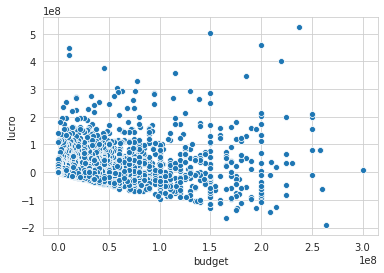

In [42]:
dtf_des2 = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro", "movie_title"]].dropna()

sns.scatterplot(x="budget", y="lucro", data = dtf_des2)

In [43]:
dtf_des2.sort_values(by=["lucro","budget"], ascending=[True, False])

,budget,lucro,movie_title
5,263700000.0,-190641321.0,John Carter
91,165000000.0,-164334574.0,The Polar Express
28,209000000.0,-143826840.0,Battleship
85,175000000.0,-136702695.0,47 Ronin
49,195000000.0,-129828140.0,Jack the Giant Slayer
...,...,...,...
3080,10500000.0,424449459.0,E.T. the Extra-Terrestrial
3024,11000000.0,449935665.0,Star Wars: Episode IV - A New Hope
26,200000000.0,458672302.0,Titanic
29,150000000.0,502177271.0,Jurassic World


O filme é "John Carter"

##Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

**Observações:**

1. Não sabe-se se faturamento do filme do dataset é apenas da bilheteria ods cinemas ou também incluem vendas de DVDs, blue-rays, e streaming após exibição nos cinemas dos EUA. Também não sabe-se se os gastos com marketing estão incluídos em "budget" no dataset, se não estiverem, o lucro calculado não corresponde ao lucro real.

2. Os filmes mais recentes do dataset são do ano de 2016;

3. Para as conclusões irá assumir que os faturamento limita-se apenas a exibições no cinema.

In [44]:
dtf_des3 = imdb_usa[["movie_title", "title_year", "lucro", "budget", "gross", "director_name"]]

dtf_des3 = dtf_des3.dropna()

dtf_des3.sort_values(by="title_year", ascending=False).head(20)

,movie_title,title_year,lucro,budget,gross,director_name
163,Gods of Egypt,2016.0,-108858926.0,140000000.0,31141074.0,Alex Proyas
2549,The Young Messiah,2016.0,-12037424.0,18500000.0,6462576.0,Cyrus Nowrasteh
2404,My Big Fat Greek Wedding 2,2016.0,41573085.0,18000000.0,59573085.0,Kirk Jones
244,The Huntsman: Winter's War,2016.0,-67047980.0,115000000.0,47952020.0,Cedric Nicolas-Troyan
1742,The Boss,2016.0,34034755.0,29000000.0,63034755.0,Ben Falcone
73,Suicide Squad,2016.0,-13912817.0,175000000.0,161087183.0,David Ayer
150,Ghostbusters,2016.0,-25900341.0,144000000.0,118099659.0,Paul Feig
154,Kung Fu Panda 3,2016.0,-1476537.0,145000000.0,143523463.0,Alessandro Carloni
65,X-Men: Apocalypse,2016.0,-23014913.0,178000000.0,154985087.0,Bryan Singer
567,The Angry Birds Movie,2016.0,34225164.0,73000000.0,107225164.0,Clay Kaytis


In [0]:
def gera_analise_lucro(str_ano):

  str_a = "title_year == " + str_ano + ".0"

  #plt.figure(figsize=(8,8))
  sns.boxplot(data = dtf_des3.query(str_a), x ="title_year", y="lucro")
  plt.show()

  print("\n")

  #plt.figure(figsize=(8,8))
  sns.distplot(dtf_des3.query(str_a)["lucro"], hist=False)
  plt.show()

  print("\n")

  return dtf_des3.query(str_a)["lucro"].describe()

#Fim da função

#### Estudo lucro do ano de 2016

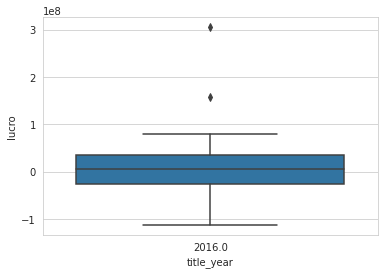

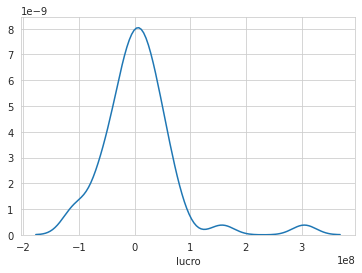

count    4.900000e+01
mean     7.352747e+06
std      6.604862e+07
min     -1.130210e+08
25%     -2.531464e+07
50%      5.566327e+06
75%      3.422516e+07
max      3.050243e+08
Name: lucro, dtype: float64

In [46]:
#dtf_des3.query("title_year == 2016.0")["lucro"].describe()

gera_analise_lucro("2016")

#### Estudo lucro ano de 2009

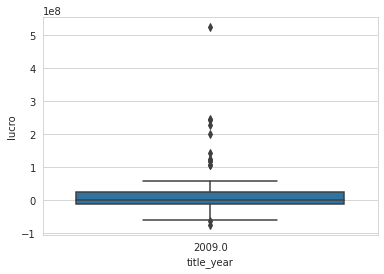

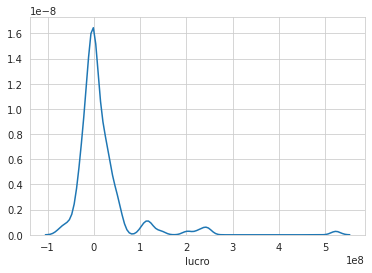

count    1.450000e+02
mean     1.632431e+07
std      6.537638e+07
min     -7.468000e+07
25%     -9.767063e+06
50%      6.707120e+05
75%      2.487028e+07
max      5.235058e+08
Name: lucro, dtype: float64

In [47]:
gera_analise_lucro("2009")

#### Estudo lucro ano 2006

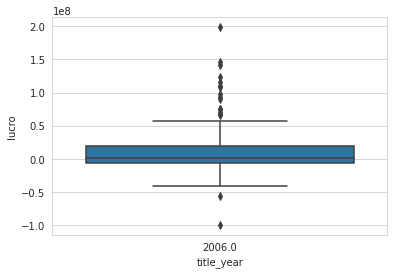

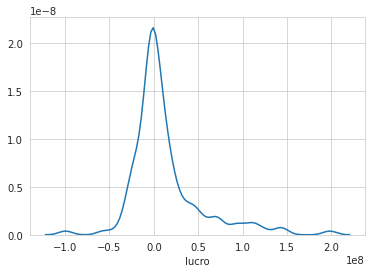

count    1.360000e+02
mean     1.288594e+07
std      4.025065e+07
min     -9.934450e+07
25%     -6.495688e+06
50%      9.839185e+05
75%      1.914010e+07
max      1.980326e+08
Name: lucro, dtype: float64

In [48]:
gera_analise_lucro("2006")

#### Estudo lucro ano 2009

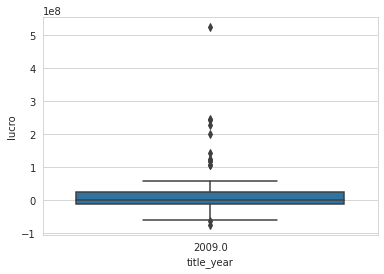

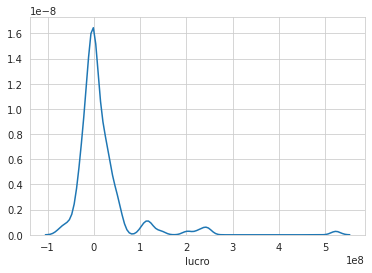

count    1.450000e+02
mean     1.632431e+07
std      6.537638e+07
min     -7.468000e+07
25%     -9.767063e+06
50%      6.707120e+05
75%      2.487028e+07
max      5.235058e+08
Name: lucro, dtype: float64

In [49]:
gera_analise_lucro("2009")

#### Estudo ano 1999

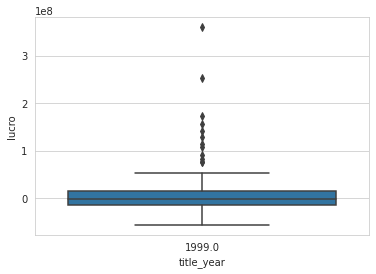

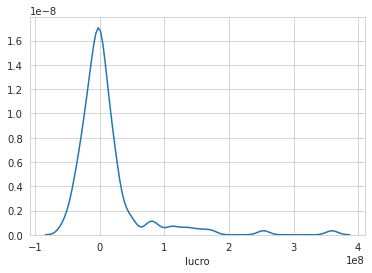

count    1.300000e+02
mean     1.074496e+07
std      5.384807e+07
min     -5.625459e+07
25%     -1.484075e+07
50%     -5.595055e+05
75%      1.607705e+07
max      3.595447e+08
Name: lucro, dtype: float64

In [50]:
gera_analise_lucro("1999")

### Conclusões

Considerando que no dataset o ano mais recente é de 2016, acredita-se que já houve empo para recuperar investimento.

Outros fatores podem afetar o lucro do filme, como campanhas de marketing, renda da população, filme mal avaliado, ...

Pelo estudo variável lucro do ano de 2016, pode-se averiguar que muitos filmes tiveram um pouco de lucro (poucos apresentaram lucro considerável) ou geraram "baixo" prejuízo (Considere os milhões investidos para se fazer o filme). A distribuição dessa variável concentra-se perto do zero. Em comparação com outros anos, para este dataset, variável lucro apresenta uma tendência a agurpar-se perto do valor 0.




## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [51]:
dtf_des4 = imdb_usa[["movie_title", "title_year", "lucro", "budget", "gross"]]

dtf_des4 = dtf_des4.query("title_year > 1929.0 & title_year < 1940.0")

dtf_des4.sort_values(by="lucro", ascending=False)

,movie_title,title_year,lucro,budget,gross
3970,Gone with the Wind,1939.0,194678278.0,3977000.0,198655278.0
4449,Snow White and the Seven Dwarfs,1937.0,182925485.0,2000000.0,184925485.0
4157,The Wizard of Oz,1939.0,19402612.0,2800000.0,22202612.0
4706,Top Hat,1935.0,2391000.0,609000.0,3000000.0
4786,42nd Street,1933.0,1861000.0,439000.0,2300000.0
4427,Modern Times,1936.0,-1336755.0,1500000.0,163245.0
2904,The Prisoner of Zenda,1937.0,NaN,NaN,NaN
3755,A Farewell to Arms,1932.0,NaN,800000.0,NaN
3960,Hell's Angels,1930.0,NaN,3950000.0,NaN
4272,Alexander's Ragtime Band,1938.0,NaN,2000000.0,NaN


## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

Gráfico original

In [52]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


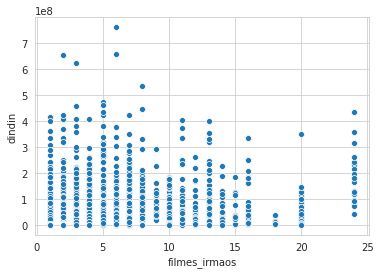

In [53]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

In [54]:
dtf_des5 = gross_director.sort_values(by="filmes_irmaos", ascending=False)

dtf_des5 = dtf_des5.query("filmes_irmaos < 20 & filmes_irmaos > 15")

dtf_des5.sort_values(by=["filmes_irmaos", "dindin"], ascending=[False, False]).head(20)

,director_name,dindin,filmes_irmaos
2932,Woody Allen,39200000.0,18.0
1960,Woody Allen,33404871.0,18.0
1975,Woody Allen,17071230.0,18.0
1737,Woody Allen,16684352.0,18.0
2070,Woody Allen,14792779.0,18.0
1861,Woody Allen,13383737.0,18.0
2166,Woody Allen,10763469.0,18.0
1869,Woody Allen,10569071.0,18.0
1872,Woody Allen,9714482.0,18.0
1538,Woody Allen,7496522.0,18.0


In [55]:
dtf_des5.query("dindin in [39200000.0,334185206.0 ]")

,director_name,dindin,filmes_irmaos
2932,Woody Allen,39200000.0,18.0
3102,Tim Burton,334185206.0,16.0
26,Tim Burton,334185206.0,16.0


## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

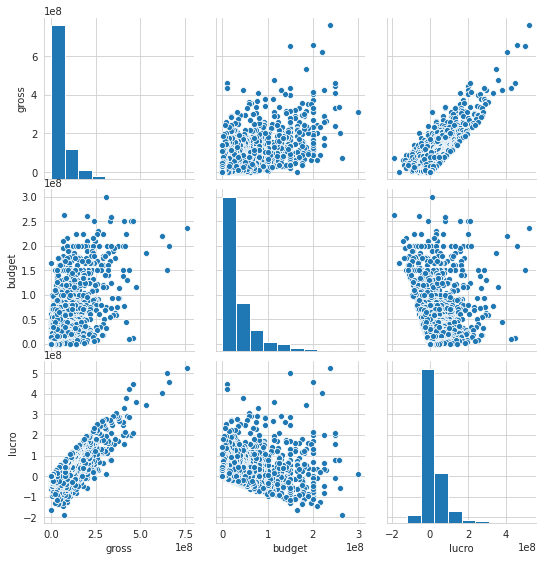

In [56]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro"]])


O gráfico *scatterplot* permite visualizar a distribuição dos dados em relação as duas variáveis, possibilitando uma análise visual de como essas "variáveis" se relcionam. O gráfico *pairplot* permite estudar a distribuição de dados entre pares de variáveis para mais de 2 variáveis.


## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [0]:
dtf_des7 = imdb_usa[["gross", "budget", "lucro", "title_year"]].query("title_year > 1999" ).dropna()

In [58]:
dtf_des7.corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.110538
budget,0.709233,1.000000,0.097307,0.133872
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.110538,0.133872,0.035039,1.000000


**gross X budget**

Apresentam correlação alta, um pouco longe de ser perfeita. Pode-se afirmar que na maioria dos casos para o conjunto de dados estudado, quando uma variável aumnetar a outra também irá aumentar.

**gross X lucro**

Apresentam correlação alta, imperfeita.  Pode-se afirmar que na maioria dos casos para o conjunto de dados estudado, quando uma variável aumnetar a outra também irá aumentar. Maior correlação dentre as variáveis analisadas.

**gross X title_year**

Quase não apresentam correlação, isto é, são quase independentes uma da outra, a varação de uma uma quase não implica em uma variação da outra.

**budget x lucro**

Quase não apresentam correlação, A variação de uma uma quase não implica em uma variação da outra.

**budget x title_year**

Quase não apresentam correlação, A variação de uma uma quase não implica em uma variação da outra. Aprersentam maior correlação em comparação com *budget x lucro*

**lucro x title_year**

Quase não apresentam correlação, A variação de uma uma quase não implica em uma variação da outra. É menor correlação dentre as variáveis analisadas.




## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

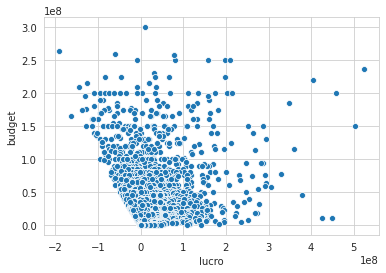

In [59]:
dtf_des8 = imdb_usa[["movie_title", "title_year", "lucro", "budget", "gross"]]

sns.scatterplot(x="lucro", y="budget", data = dtf_des8)

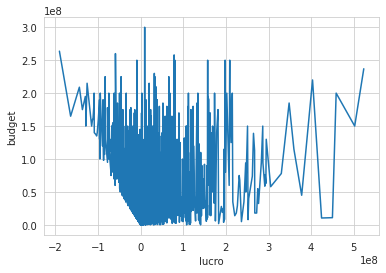

In [60]:
sns.lineplot( x="lucro", y="budget", data = dtf_des8 )

Como "budget" e "lucro" não são variáveis fortemente correlacionadas, é muito difícil estabelecer uma reta entre essas duas variáveis.

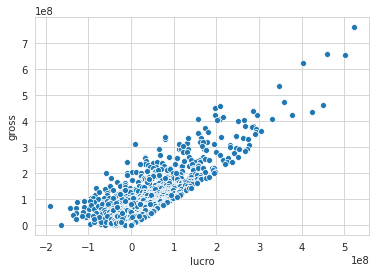

In [61]:
sns.scatterplot(x="lucro", y="gross", data = dtf_des8)

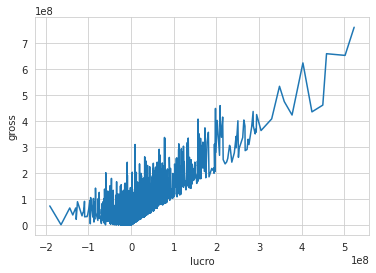

In [62]:
sns.lineplot( x="lucro", y="gross", data = dtf_des8 )

Como "gross" e "lucro" são fortemente correlacionadas positivamente, quando gross aumenta provalvelmente o lucro também aumentará. Existem casos que não é verdade a afirmação anterior, pelo gráfico pode-se constatar que existem filmes que deram prejuízo.

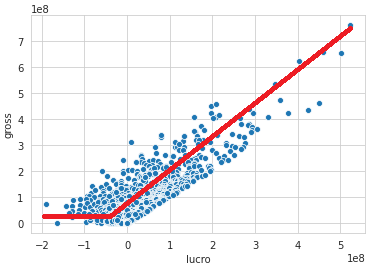

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


In [63]:
dtf_des9 = imdb

dtf_des9 = dtf_des9[["imdb_score", "num_voted_users", "title_year"]].dropna()

dtf_des9.corr()

,imdb_score,num_voted_users,title_year
imdb_score,1.000000,0.427629,-0.207591
num_voted_users,0.427629,1.000000,0.007232
title_year,-0.207591,0.007232,1.000000


**imdb_score x num_vodted_users**

Apresenta correlação positiva, mas não se aproxima de uma relação linear bem definida. 

**imdb_score x title_year**

Apresenta correlação negativa, próxima da neutralidade.

**title_year x num_vodted_users**

Correlação bem próxima do zero, indicando que praticamente são variáveis independentes entre si.